In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydataset
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from wrangle import wrangle_zillow
from sklearn.model_selection import train_test_split
from env import get_db_url
import warnings
warnings.filterwarnings("ignore")

## Exercises
### Do your work for these exercises in a jupyter notebook named scaling. Use the zillow dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

- 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

- 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

- 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

- 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

- 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [2]:
df = wrangle_zillow()

In [3]:
df.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
0,4,2.0,3633,296425,2005,6941.39,6037
1,3,4.0,1620,847770,2011,10244.94,6037
2,3,2.0,2077,646760,1926,7924.68,6037
3,0,0.0,1200,5328,1972,91.60,6037
4,0,0.0,171,6920,1973,255.17,6037


In [4]:
# split the data in train, validate and test
train, test = train_test_split(df, test_size = 0.2, random_state = 123)
train, validate = train_test_split(train, test_size = 0.25, random_state = 123)

In [5]:
#check the shape
train.shape, validate.shape, test.shape

((1256749, 7), (418917, 7), (418917, 7))

In [6]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
1397104,4,3.0,1554,446970,1948,5363.83,6037
1541311,2,2.0,1508,322750,1939,4087.51,6037
349572,3,3.0,2775,754493,1962,8281.34,6037
1956887,4,4.0,4361,1407000,1972,15008.38,6059
1769654,4,2.0,2465,132915,1974,1840.82,6059


In [7]:
columns_to_scale = ['bedrooms','bathrooms','year_built','area','tax_value','taxamount']

In [8]:
train_scaled = train.copy() 
scaler = MinMaxScaler()
train_scaled[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])

In [9]:
#you do not need to scale the target - tax_value



In [10]:
# Define the thing
scaler = sklearn.preprocessing.MinMaxScaler()

# Fit the thing
scaler.fit(train[['tax_value']])

#transform
scaled = scaler.transform(train[['tax_value']])


# single step to fit and transform
scaled = scaler.fit_transform(train[['tax_value']])
scaled

array([[0.22348674],
       [0.1613732 ],
       [0.377257  ],
       ...,
       [0.23902962],
       [0.03647858],
       [0.11212689]])

In [11]:
#you can make a new 'scaled' column in original dataframe if you wish
train['tax_value_scaled']  = scaled  

In [12]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips,tax_value_scaled
1397104,4,3.0,1554,446970,1948,5363.83,6037,0.223487
1541311,2,2.0,1508,322750,1939,4087.51,6037,0.161373
349572,3,3.0,2775,754493,1962,8281.34,6037,0.377257
1956887,4,4.0,4361,1407000,1972,15008.38,6059,0.703529
1769654,4,2.0,2465,132915,1974,1840.82,6059,0.066450


Text(0, 0.5, 'Year Built')

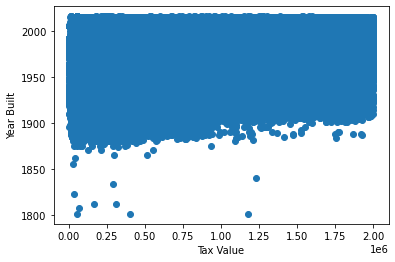

In [13]:
plt.scatter(df.tax_value, df.year_built)
plt.xlabel('Tax Value')
plt.ylabel('Year Built')

Text(0, 0.5, 'Scaled Tax Value')

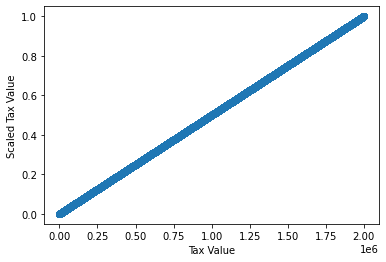

In [14]:
# plot non scaled vs scaled

plt.scatter(train.tax_value, scaled)
plt.xlabel('Tax Value')
plt.ylabel('Scaled Tax Value')

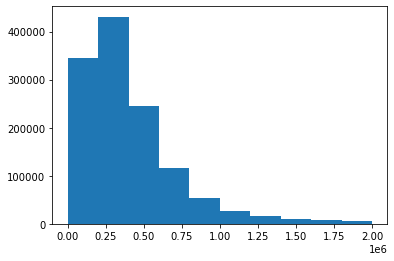

In [15]:

plt.hist(train.tax_value); 

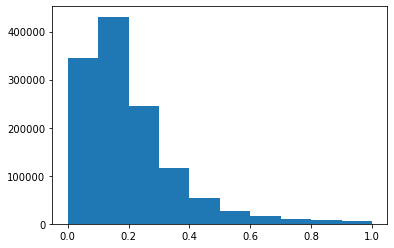

In [16]:
plt.hist(scaled);

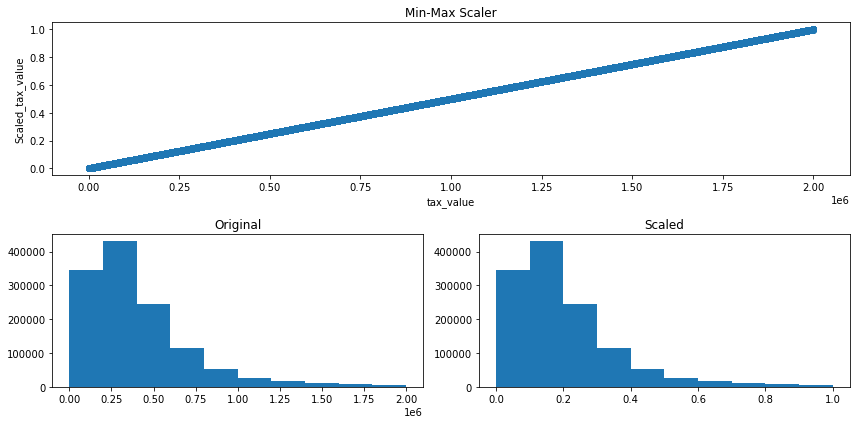

In [17]:
fig = plt.figure(figsize = (12,6))

gs = plt.GridSpec(2,2)

ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

ax1.scatter(train.tax_value, scaled)
ax1.set(xlabel = 'tax_value', ylabel = 'Scaled_tax_value', title = 'Min-Max Scaler')

ax2.hist(train.tax_value)
ax2.set(title = 'Original')

ax3.hist(scaled)
ax3.set(title = 'Scaled')
plt.tight_layout();

In [18]:
def visualize_scaled_date(scaler, scaler_name, feature):
    scaled = scaler.fit_transform(train[[feature]])
    fig = plt.figure(figsize = (12,6))

    gs = plt.GridSpec(2,2)

    ax1 = fig.add_subplot(gs[0, :])
    ax2 = fig.add_subplot(gs[1,0])
    ax3 = fig.add_subplot(gs[1,1])

    ax1.scatter(train[[feature]], scaled)
    ax1.set(xlabel = feature, ylabel = 'Scaled_' + feature, title = scaler_name)

    ax2.hist(train[[feature]])
    ax2.set(title = 'Original')

    ax3.hist(scaled)
    ax3.set(title = 'Scaled')
    plt.tight_layout();

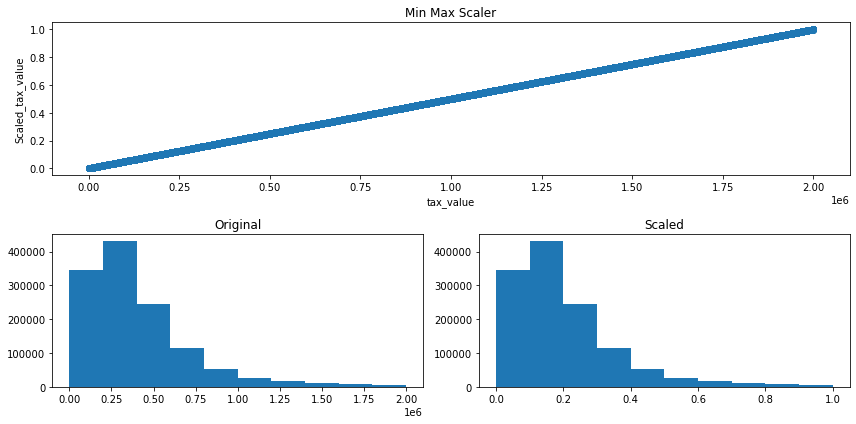

In [19]:
# use the function created above for tax value

visualize_scaled_date(sklearn.preprocessing.MinMaxScaler(), 'Min Max Scaler', 'tax_value')

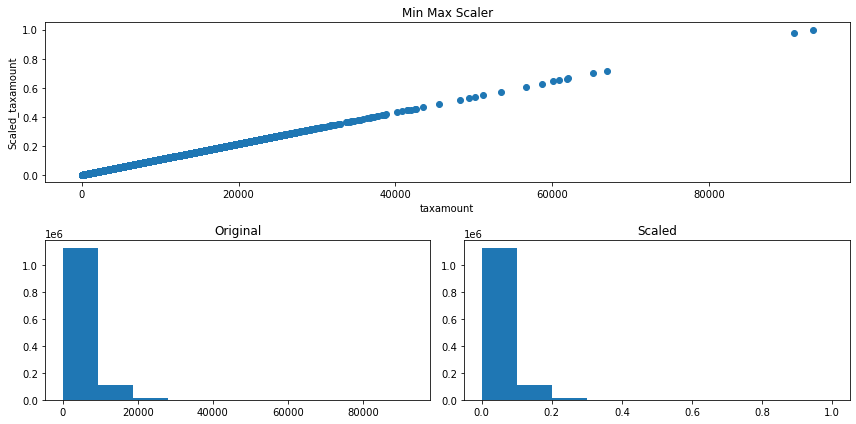

In [20]:
# visualize scaling for tenure

visualize_scaled_date(sklearn.preprocessing.MinMaxScaler(), 'Min Max Scaler', 'taxamount')

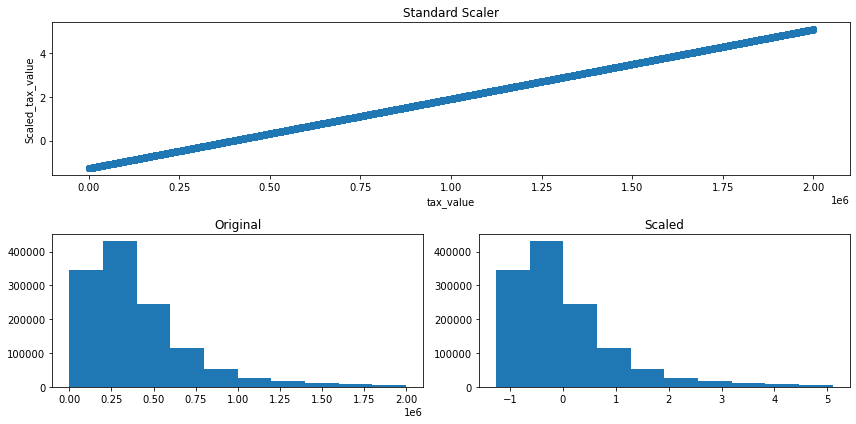

In [21]:
# visualize scaling for tax_value

visualize_scaled_date(sklearn.preprocessing.StandardScaler(), 'Standard Scaler', 'tax_value')

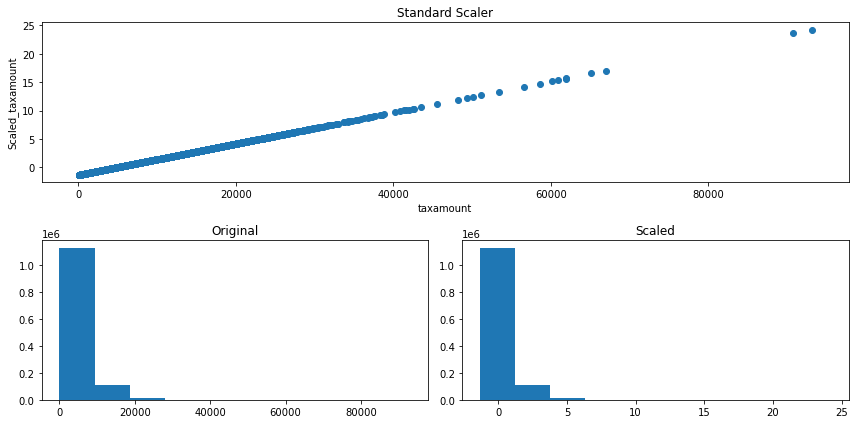

In [22]:
# visualize scaling for tax_amount

visualize_scaled_date(sklearn.preprocessing.StandardScaler(), 'Standard Scaler', 'taxamount')

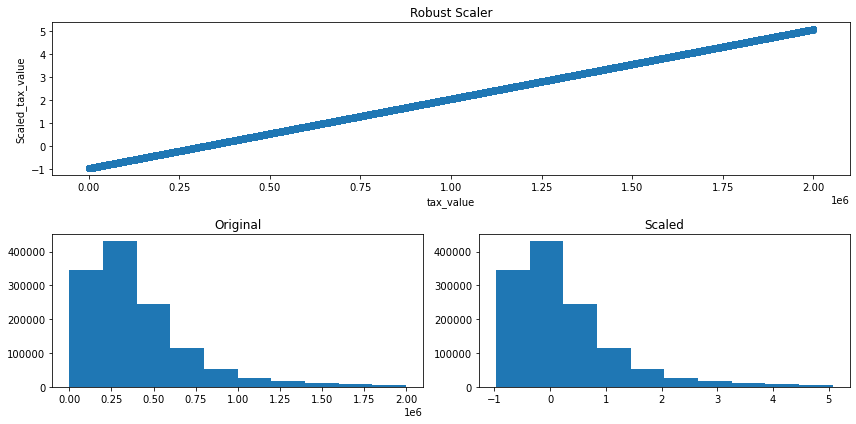

In [23]:
visualize_scaled_date(sklearn.preprocessing.RobustScaler(), 'Robust Scaler', 'tax_value')

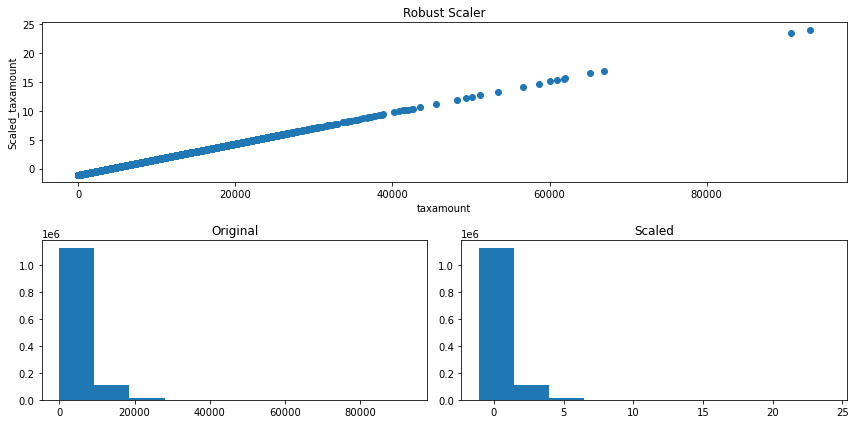

In [24]:
visualize_scaled_date(sklearn.preprocessing.RobustScaler(), 'Robust Scaler', 'taxamount')

In [26]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips,tax_value_scaled
1397104,4,3.0,1554,446970,1948,5363.83,6037,0.223487
1541311,2,2.0,1508,322750,1939,4087.51,6037,0.161373
349572,3,3.0,2775,754493,1962,8281.34,6037,0.377257
1956887,4,4.0,4361,1407000,1972,15008.38,6059,0.703529
1769654,4,2.0,2465,132915,1974,1840.82,6059,0.066450


In [28]:
scaler = sklearn.preprocessing.MinMaxScaler()

scaled = scaler.fit_transform(train[['bedrooms','bathrooms']])
scaled

array([[0.66666667, 0.5       ],
       [0.33333333, 0.33333333],
       [0.5       , 0.5       ],
       ...,
       [0.5       , 0.33333333],
       [0.5       , 0.16666667],
       [0.66666667, 0.41666667]])

In [29]:
scaled_df = pd.DataFrame(scaled, index = train.index, columns = ['bedrooms','bathrooms'])
scaled_df.head()

,bedrooms,bathrooms
1397104,0.666667,0.500000
1541311,0.333333,0.333333
349572,0.500000,0.500000
1956887,0.666667,0.666667
1769654,0.666667,0.333333


In [30]:
# use inverse_transform method

scaler.inverse_transform(scaled_df)

array([[4. , 3. ],
       [2. , 2. ],
       [3. , 3. ],
       ...,
       [3. , 2. ],
       [3. , 1. ],
       [4. , 2.5]])

In [31]:
# we can change numpy 2d array to a dataframe

unscaled_df = pd.DataFrame(scaler.inverse_transform(scaled), index = train.index, columns = ['bedrooms','bathrooms'])
unscaled_df.head()

,bedrooms,bathrooms
1397104,4.0,3.0
1541311,2.0,2.0
349572,3.0,3.0
1956887,4.0,4.0
1769654,4.0,2.0


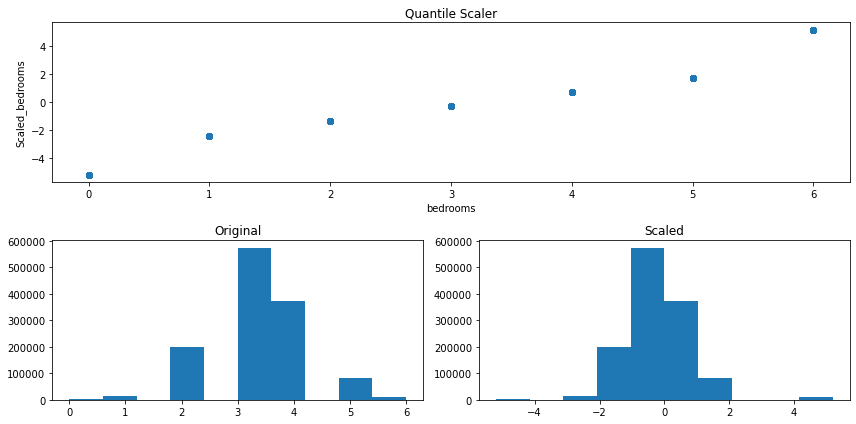

In [32]:
#visualize monthly charges quantile transformation with 'normal' output

visualize_scaled_date(sklearn.preprocessing.QuantileTransformer(output_distribution='normal'), 'Quantile Scaler', 'bedrooms')

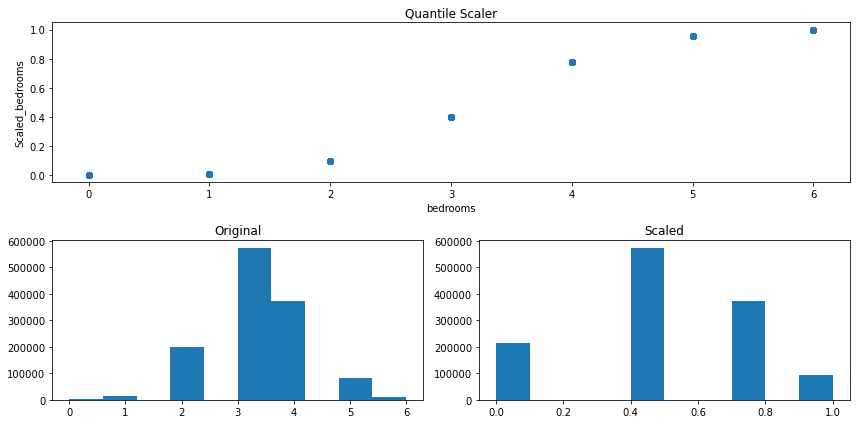

In [33]:
#visualize monthly charges quantile transformation with 'uniform' output

visualize_scaled_date(sklearn.preprocessing.QuantileTransformer(), 'Quantile Scaler', 'bedrooms')